In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Cargar los datos mejorados
df = pd.read_excel("/content/drive/MyDrive/MAESTRIA_INDICE_VIOLENCIA/Datos_Criminalidad_Consolidado_Limpiado.xlsx")

In [ ]:
# Seleccionar características relevantes
features = ['mes', 'anio', 'hora', 'edad', 'total_noticias_delito']
X = df[features]
y = df['es_violento']

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definir modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

In [ ]:
# Evaluación de modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:09:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4932, number of negative: 84
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 5016, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.983254 -> initscore=4.072683
[LightGBM] [Info] Start training from score 4.072683


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Convertir resultados en un DataFrame
results_df = pd.DataFrame(results).T


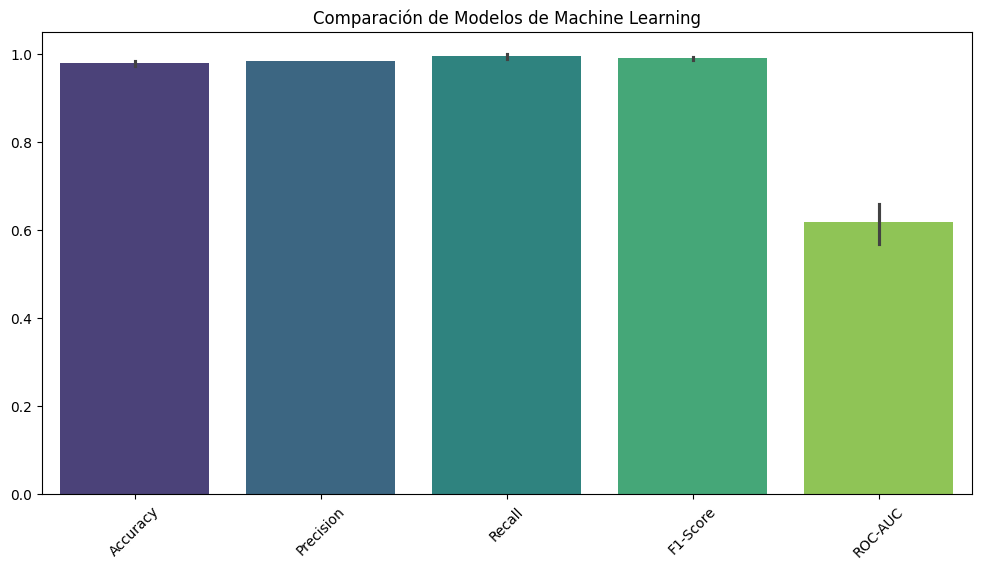

In [ ]:
# Graficar métricas
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, palette="viridis")
plt.title("Comparación de Modelos de Machine Learning")
plt.xticks(rotation=45)
plt.show()

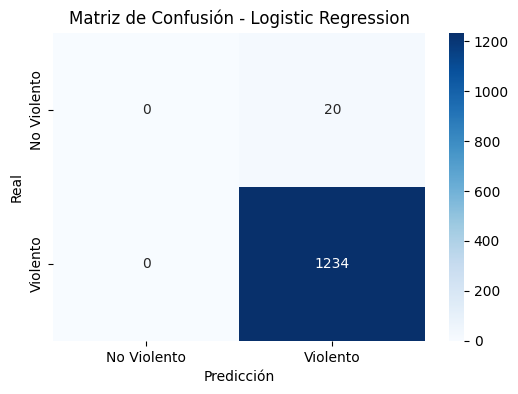

Resultados de Evaluación de Modelos:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.984051   0.984051  1.000000  0.991961  0.632921
Decision Tree        0.961722   0.984477  0.976499  0.980472  0.512804
Random Forest        0.979266   0.983974  0.995138  0.989525  0.606078
Gradient Boosting    0.984051   0.984051  1.000000  0.991961  0.605146
XGBoost              0.982456   0.984026  0.998379  0.991150  0.692484
LightGBM             0.982456   0.984026  0.998379  0.991150  0.650263


In [ ]:
# Mostrar matriz de confusión para el mejor modelo
best_model_name = results_df['F1-Score'].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Violento', 'Violento'], yticklabels=['No Violento', 'Violento'])
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print("Resultados de Evaluación de Modelos:")
print(results_df)
